## Predizer se um candidado do ENEM fez a prova e solicitou a certificação do Ensino Médio.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

## leitura dos dados

In [2]:
data = pd.read_csv("enem.csv")
print(data.shape)
data.head()

(13730, 167)


,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


## Quantidade de candidatos que solicitaram.
 1 - Sim
 
 2 - Não

In [18]:
print(data['IN_CERTIFICADO'].isnull().sum())
print('-------------------')
print(data.groupby('IN_CERTIFICADO').size())

0
-------------------
IN_CERTIFICADO
0    12092
1     1638
dtype: int64


## Filtrando dados importantes

In [4]:
dados = pd.DataFrame()

dados['NU_NOTA_CN'] = data['NU_NOTA_CN']
dados['NU_NOTA_CH'] = data['NU_NOTA_CH']
dados['NU_NOTA_LC'] = data['NU_NOTA_LC']
dados['NU_NOTA_REDACAO'] = data['NU_NOTA_REDACAO']
dados['NU_NOTA_MT'] = data['NU_NOTA_MT']
dados['IN_CERTIFICADO'] = data['IN_CERTIFICADO']
print(dados.shape)
print("---------------")
dados.head()

(13730, 6)
---------------


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,IN_CERTIFICADO
0,436.3,495.4,581.2,520.0,399.4,0
1,474.5,544.1,599.0,580.0,459.8,0
2,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,0


## Visualização dos dados

In [5]:
dados.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,IN_CERTIFICADO
count,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,473.495155,529.661087,516.472841,529.048258,482.497928,0.119301
std,71.093674,73.726344,68.688190,154.294758,99.826323,0.324154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,440.000000,408.900000,0.000000
50%,459.800000,532.000000,520.900000,540.000000,461.200000,0.000000
75%,514.500000,581.200000,564.900000,600.000000,537.600000,0.000000
max,806.400000,807.000000,763.600000,1000.000000,952.000000,1.000000


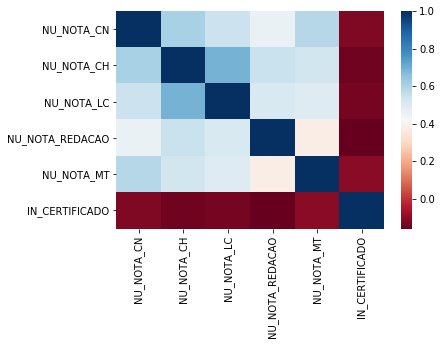

In [6]:
corr = dados.corr()
sns.heatmap(corr, xticklabels=dados.columns, yticklabels=dados.columns, cmap='RdBu');

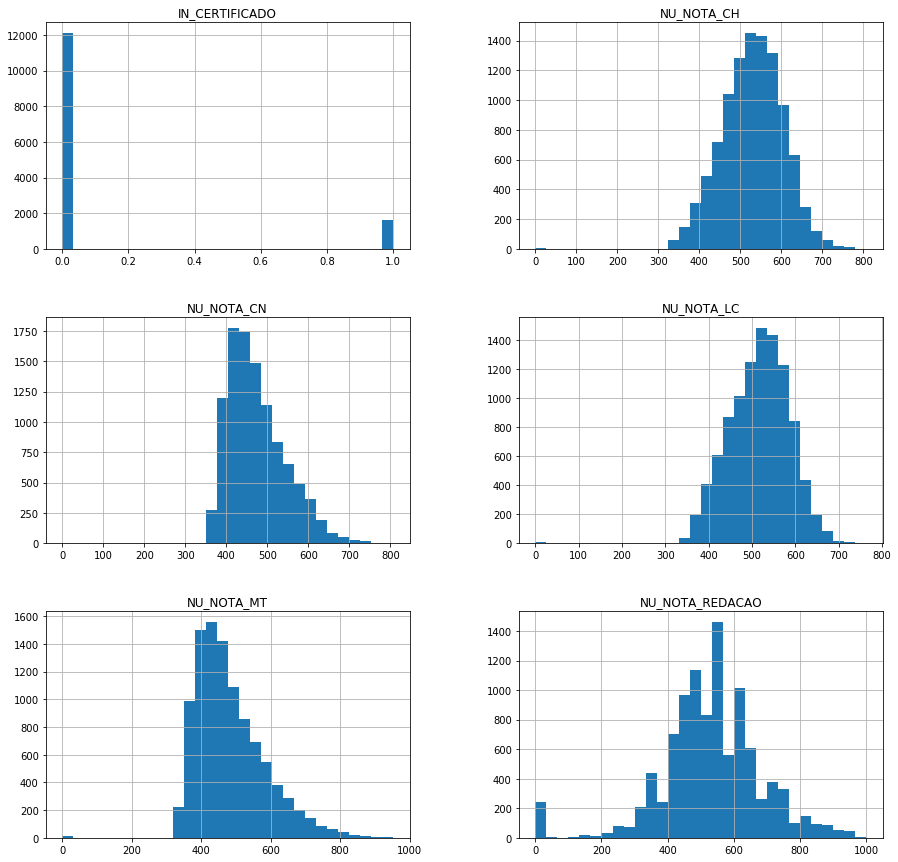

In [7]:
dados.hist(figsize=(15,15), bins=30);

## Removendo linhas com dados faltantes

In [8]:
dados = dados.dropna()
print(dados.shape)
dados.head()

(10097, 6)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,IN_CERTIFICADO
0,436.3,495.4,581.2,520.0,399.4,0
1,474.5,544.1,599.0,580.0,459.8,0
5,439.7,583.2,410.9,620.0,364.5,0
6,420.1,604.2,484.5,560.0,529.2,0
7,619.6,625.8,611.2,620.0,566.7,0


## Separando em dados de treino e dados de teste
### Usaremos 75% dos valores para treino e 25% para teste

In [9]:
values = dados.values
np.random.seed(1)
np.random.shuffle(values)
x_train = values[ :int(10097*0.75), 0:5]
x_test = values[ int(10097*0.75):, 0:5]
y_train = values[ :int(10097*0.75), 5]
y_test = values[ int(10097*0.75):, 5]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7572, 5) (2525, 5) (7572,) (2525,)


## Criação do modelos de predição
### Criação do modelo de Regressão Logistica

In [10]:
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

0.8958415841584159

## Métricas do modelo

In [19]:
print(metrics.accuracy_score(y_test, lr_pred))
print(metrics.classification_report(y_test, lr_pred))

0.8958415841584159
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95      2261
        1.0       1.00      0.00      0.01       264

avg / total       0.91      0.90      0.85      2525

